<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN? 
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Proses algoritma KNN:
1. Menentukan parameter K, bilangan bulat positif sebagai nearest neighbors (banyaknya tetangga terdekat). 
2. Hitung jarak antara data baru dan semua data yang ada di data training. 
3. Menentukan k tetangga terdekat berdasarkan jarak minimum.
4. Melakukan voting, dimana tetangga yang memiliki frekuensi terbanyak diambil sebagai nilai prediksi atau hasil klasifikasi dari data baru tersebut.

1. Sangat sensitif terhadap data pencilan
2. Jika k nya genap dan class label tetangga terdekatnya memiliki jumlah sama, secara default kNN akan memilih kelas secara random.

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [7]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

ks = np.arange(2, 21)
weights = ['distance', 'uniform']
def knn_predict(k, weight):
    model = KNeighborsClassifier(n_neighbors = k, weights=weight)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

In [9]:
KNeighborsClassifier?

In [10]:
list_uniform_score = []
list_distance_score =[]
for k, weight in product(ks, weights):
    score = knn_predict(k = k, weight=weight)
    if weight == 'uniform':
        list_uniform_score.append(score)
    elif weight == 'distance':
        list_distance_score.append(score)

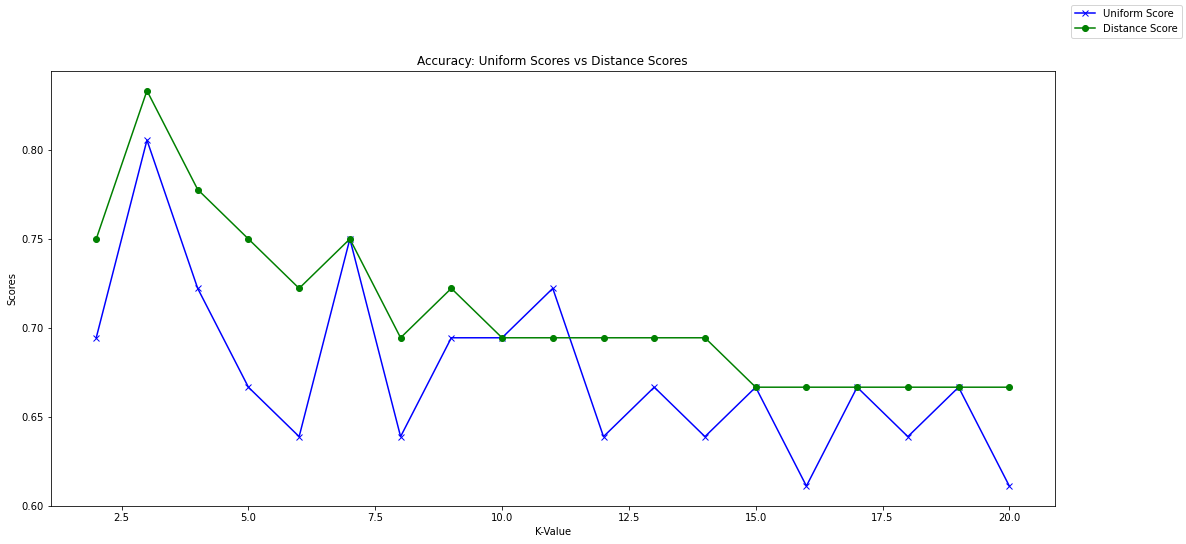

In [19]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(18,8))
ax.plot(ks, list_uniform_score, c='b', label='Uniform Score', marker='x')
ax.plot(ks, list_distance_score, c='g', label = 'Distance Score', marker='o')
ax.set_xlabel('K-Value')
ax.set_ylabel('Scores')
ax.set_title('Accuracy: Uniform Scores vs Distance Scores')
fig.legend()
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [27]:
import numpy as np

rng = np.random.RandomState(1)

x = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [29]:
from sklearn.linear_model import LinearRegression

# membangun model matematis
model_lr = LinearRegression(fit_intercept = True)
model_lr.fit(x, y)

LinearRegression()

In [30]:
# parameter koefesien dari model
model_lr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [34]:
# parameter intercept dari model
model_lr.intercept_

0.5000000016247412

In [33]:
# model matematis
y = 1.5*x - 5*x + 9*x + 10*x + 5